<a href="https://colab.research.google.com/github/abdyraman/hr-deep-learning/blob/main/deep_hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Employee retention strategies are integral to the success and well-being of a company. There are often many reasons why employees leave an organization, and in this case study, I will explore some of the key drivers of employee attrition. Employee attrition measures how many workers have left an organization and is a common metric companies use to assess their performance. While turnover rates vary from industry to industry, the [Bureau of Labor Statistics reported](https://www.bls.gov/news.release/jolts.t18.htm#) that among voluntary separations the overall turnover rate was 25% in 2020.


In this notebook, I will explore [IBM's dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) on HR Analytics. The data consists of nearly 1,500 current and former employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data.

**Employee Attrition Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings
import sklearn as skl
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import plotly.express as px
from statistics import stdev
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [2]:
df_full = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# There are 1,470 rows and 35 columns in the data
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#check for NaN values
df_full.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
have_duplicate_rows = df_full.duplicated().any()
have_duplicate_rows

False

**Data cleaning**

There is no missing value and duplicate rows in dataset. Some of columns can be removed, because their values do not affect the analysis results:

Over18: All values are Y

EmployeeCount: all values are 1.0

StandardHours: all values are 80.0

EmployeeNumber: is the id of the employee that their values do not affect the analysis results.

In [28]:
# remove 4 columns
df = df_full.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

**Descriptive statistics**

Text data analysis- categorical values

In [7]:
unique_counts_objects = df.select_dtypes('object').nunique()
unique_counts_objects

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [8]:
# Loop through each categorical variable and print its unique values
for i in unique_counts_objects.index:
    print('Unique values of', i, set(df[i]))

Unique values of Attrition {'No', 'Yes'}
Unique values of BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
Unique values of Department {'Human Resources', 'Research & Development', 'Sales'}
Unique values of EducationField {'Life Sciences', 'Marketing', 'Medical', 'Other', 'Human Resources', 'Technical Degree'}
Unique values of Gender {'Female', 'Male'}
Unique values of JobRole {'Sales Executive', 'Manufacturing Director', 'Research Director', 'Sales Representative', 'Manager', 'Human Resources', 'Research Scientist', 'Healthcare Representative', 'Laboratory Technician'}
Unique values of MaritalStatus {'Divorced', 'Single', 'Married'}
Unique values of OverTime {'No', 'Yes'}


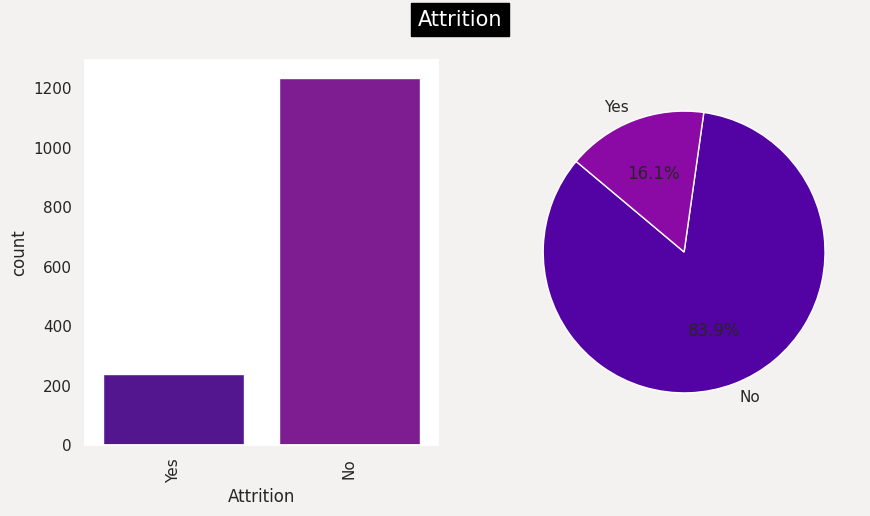

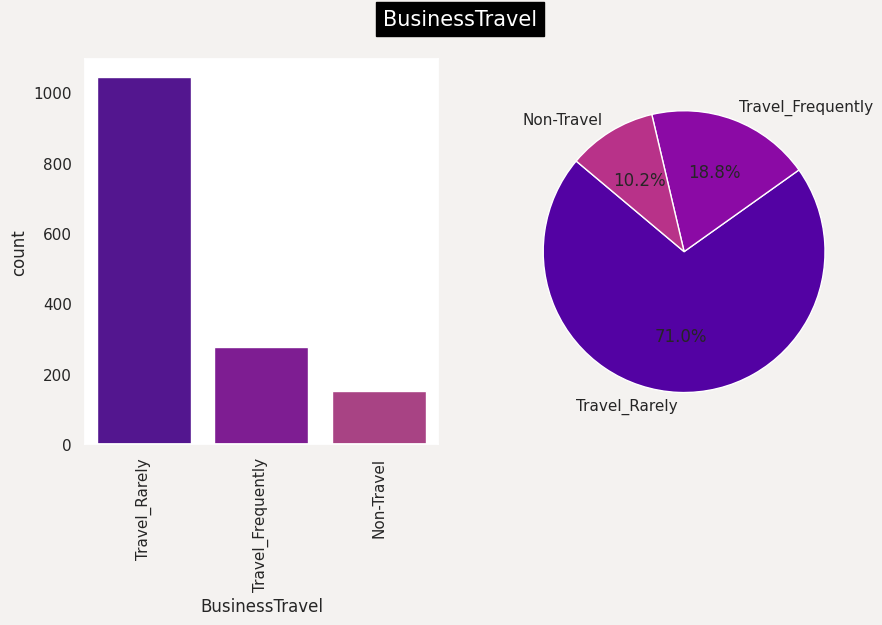

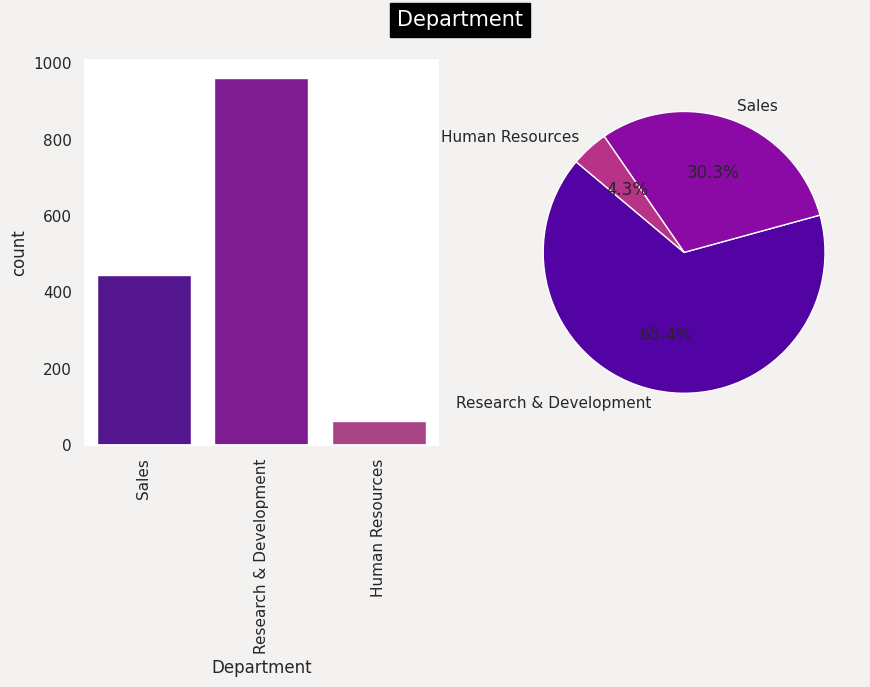

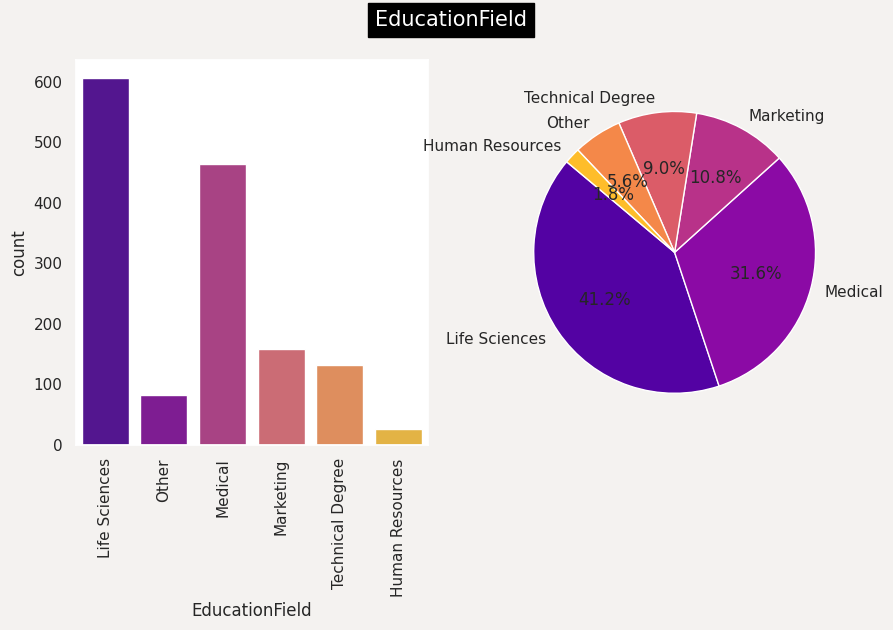

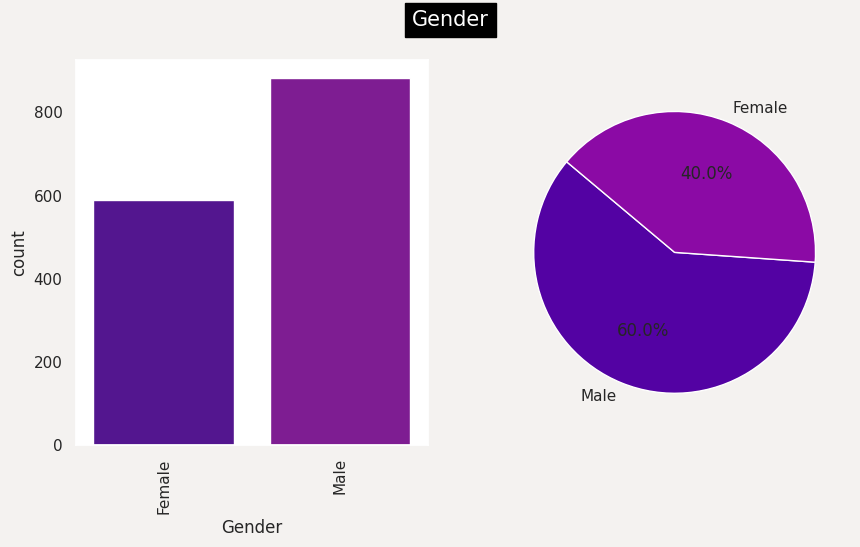

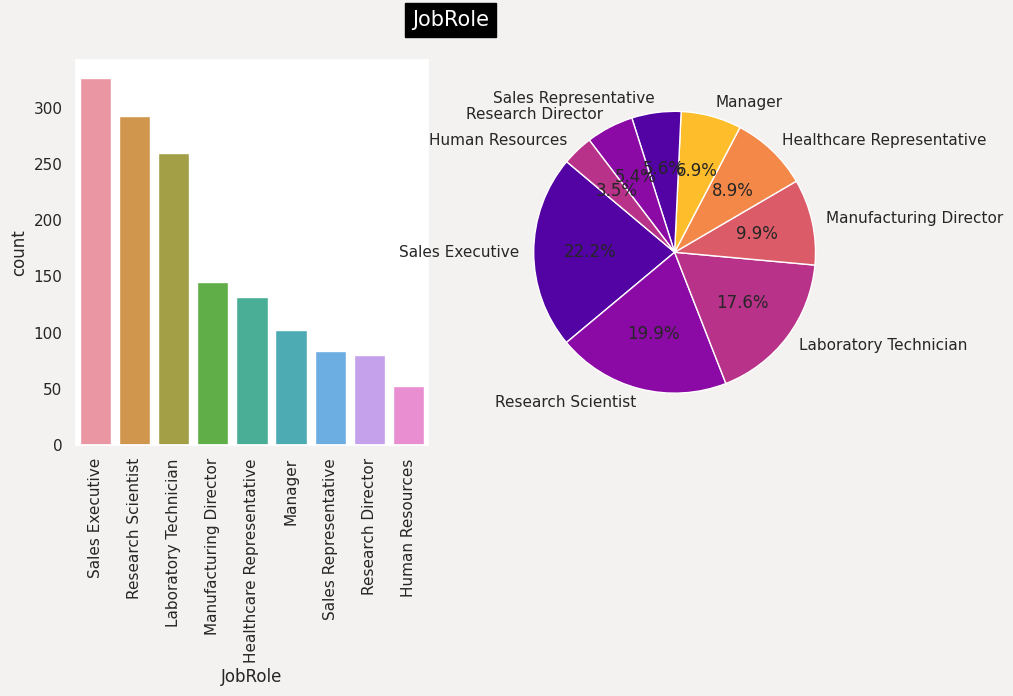

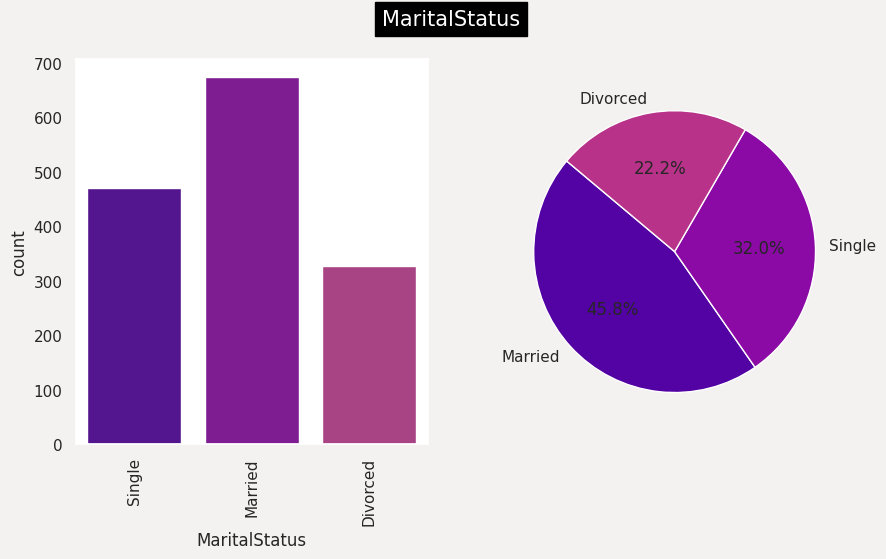

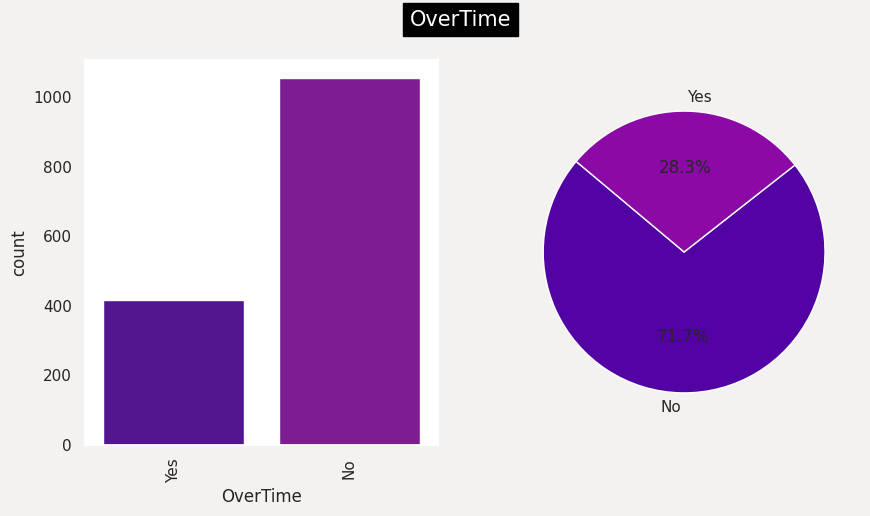

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming unique_counts_objects is a Series containing the number of unique values for each categorical variable

sns.set(rc={"axes.facecolor": "white", "figure.facecolor": '#F4F2F0'})
sns.set_palette("plasma")

# Loop through each categorical variable and create countplot and pie chart
for col in unique_counts_objects.index:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Countplot
    ax1 = sns.countplot(data=df, x=col, ax=axes[0])
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    # Pie chart
    count_values = df[col].value_counts()
    ax2 = axes[1]
    ax2.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=140)
    ax2.set_aspect("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.suptitle(col, backgroundcolor='black', color='white', fontsize=15)
    plt.show()


Overall, around 16% of employees left the company.

According to industry benchmarks, the healthy attrition rate ranges between 10%-15% nationally. Dataset shows it is a steady rate of employee turnover, suggesting a well-functioning organization with a balanced hiring and termination process.

Numeric Data Analysis

In [10]:
num=df.select_dtypes('int64')
num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


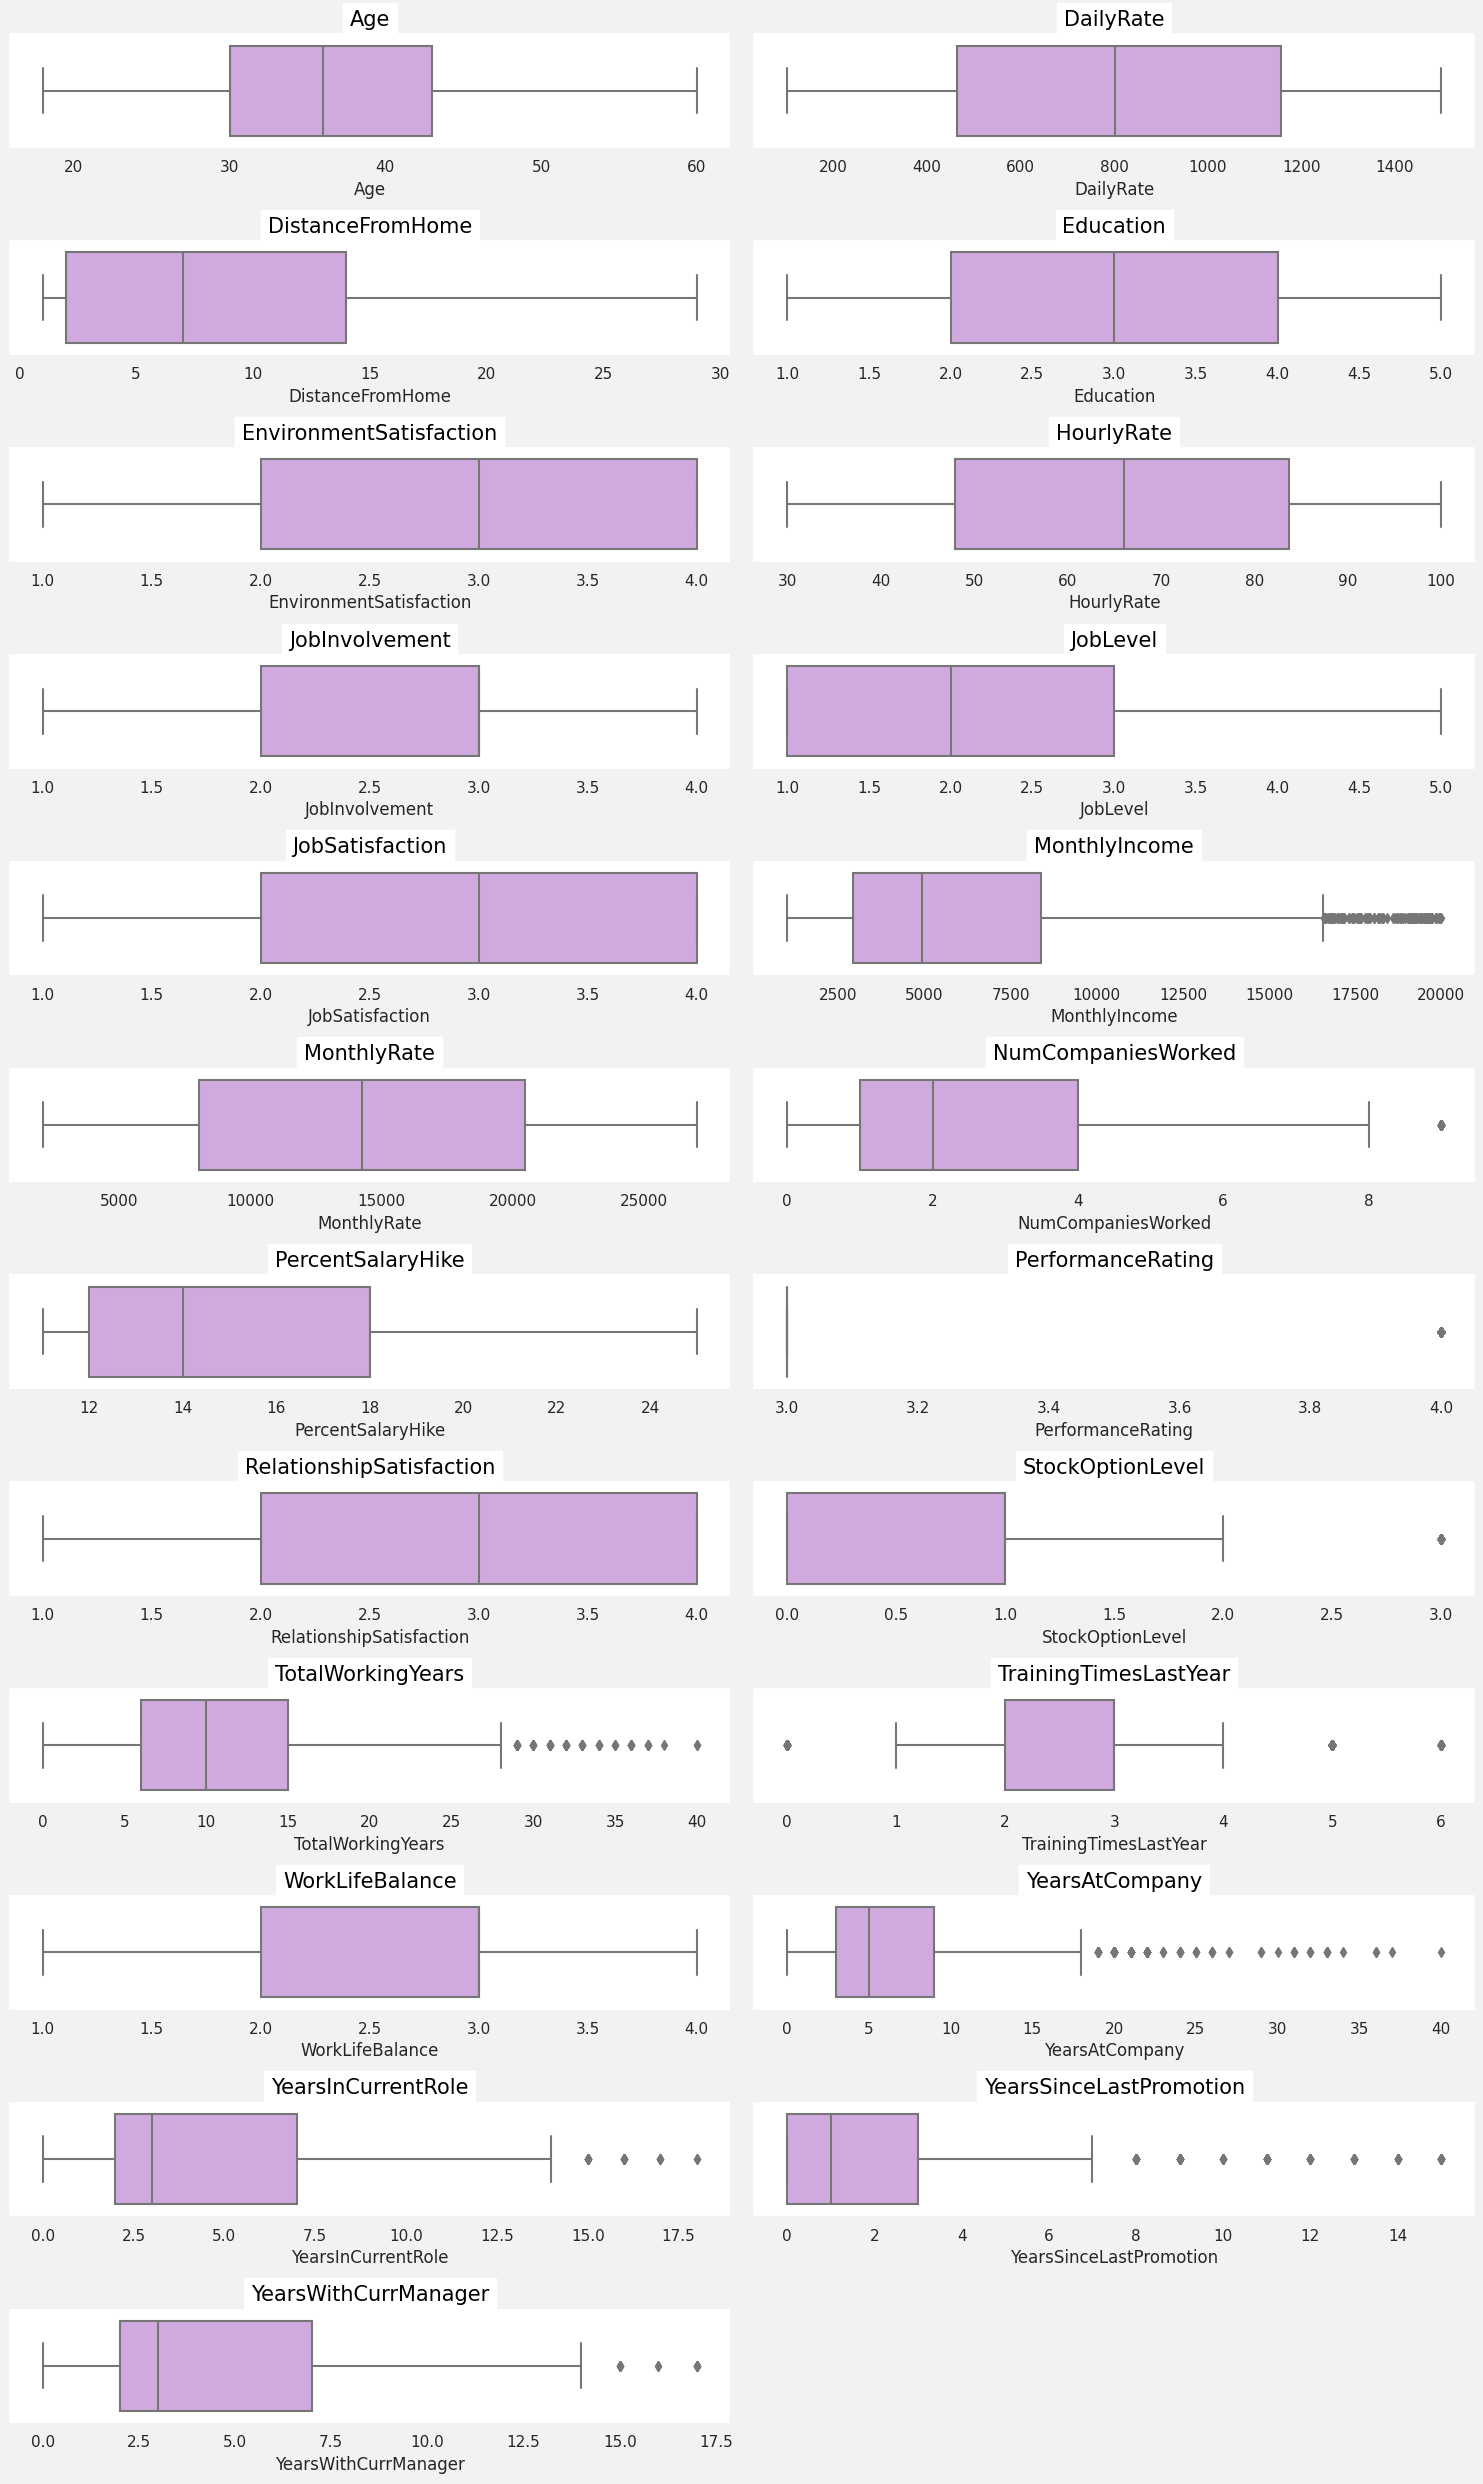

In [11]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df,palette=["#D4A1E7","#6faea4"])
    plt.title(i,backgroundcolor='white',color='black',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

**Analysis**

In [12]:
import plotly.express as px

def plot_attrition_rates(df, attribute):
    # Grouping by Gender, specified attribute, and Attrition; calculating normalized counts
    plot_df = df.groupby(['Gender', attribute])['Attrition'].value_counts(normalize=True)

    # Multiplying by 100, renaming columns, and resetting index
    plot_df = plot_df.mul(100).rename('Percent').reset_index()

    # Creating the bar plot using plotly express
    fig = px.bar(plot_df, x=attribute, y="Percent", color="Attrition", barmode="group",
                 text='Percent', opacity=.75, facet_col="Gender",
                 category_orders={'Attrition': ['Yes', 'No']},
                 color_discrete_map={'Yes': "#D4A1E7", 'No': "#6faea4"})


    # Updating trace properties
    fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                      marker_line=dict(width=1, color='#28221D'), width=.4)

    # Updating layout properties
    fig.update_layout(title_text=f'Attrition Rates by {attribute} and Gender', yaxis_ticksuffix='%',
                      paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', font_color='#28221D',
                      height=500, xaxis=dict(tickangle=30))

    # Updating x-axis properties for better readability
    fig.update_xaxes(showticklabels=True, tickangle=30, col=2)

    # Updating y-axis properties
    fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')

    # Displaying the plot
    fig.show()


plot_attrition_rates(df, 'Department')

Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. For men, the highest turnover occurred in the Sales department.

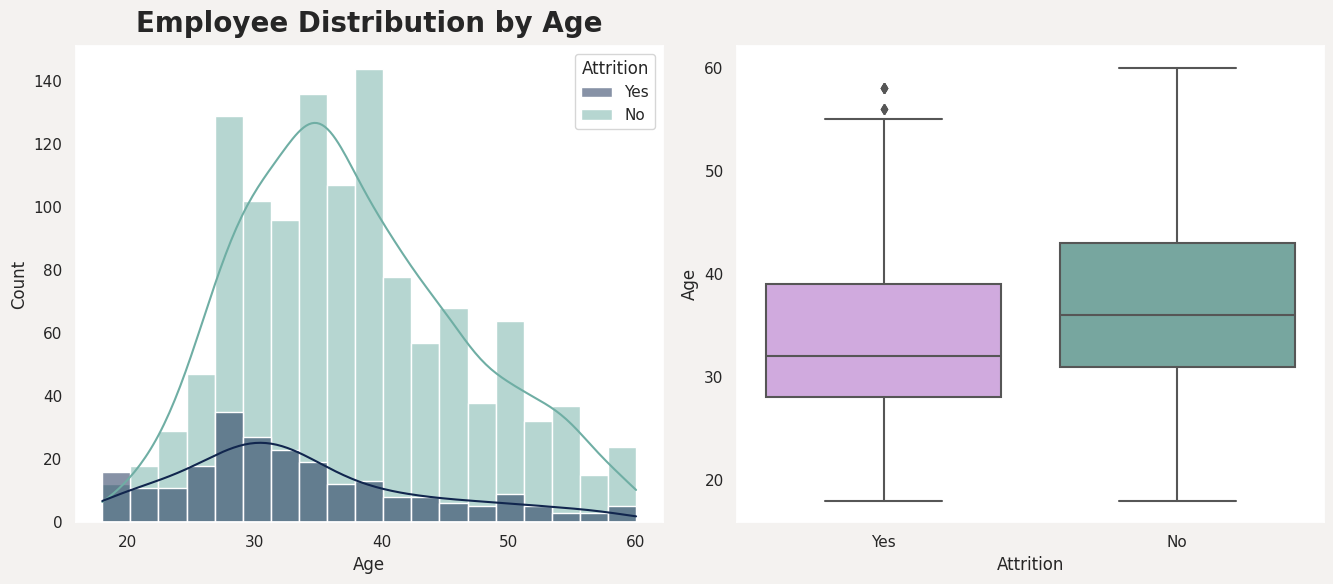

In [13]:

def distribution_plots(attribute):
    plt.figure(figsize=(13.5, 6))

    # First Subplot (Histogram with KDE)
    plt.subplot(1, 2, 1)
    sns.histplot(x=attribute, hue="Attrition", data=df, kde=True, palette=["#11264e", "#6faea4"])
    plt.title(f"Employee Distribution by {attribute}", fontweight="black", size=20, pad=10)

    # Second Subplot (Boxplot)
    plt.subplot(1, 2, 2)
    sns.boxplot(x="Attrition", y=attribute, data=df, palette=["#D4A1E7", "#6faea4"])
    # plt.title(f"Employee Distribution by {attribute} & Attrition", fontweight="black", size=20, pad=10)

    # Layout and Display
    plt.tight_layout()
    plt.show()

# Call the function with the attribute 'Age'
distribution_plots('Age')

Most of the emloyees are between age 30 to 40. We can clearly observe a trend that as the age is increasing the attrition is decreasing. From the boxplot we can also observe that the medain age of employee who left the organization is less than the employees who are working in the organization.

In [14]:
plot_attrition_rates(df, 'MaritalStatus')

Single individuals had higher frequency of departure from the organization compared to their married and divorced counterparts.

In [15]:
plot_attrition_rates(df, 'BusinessTravel')

Frequent travelers have higher attrition rate.

In [16]:
plot_attrition_rates(df, 'JobRole')

Among women, the roles with the highest attrition rates are Sales Representative and HR, while for men, Sales Representative and Laboratory Technicians experience notable turnover.

In [17]:
plot_attrition_rates(df, 'OverTime')

People who do overtime leave more often than those who don't.

In [18]:
plot_df = df.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False).sort_values('Gender')
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',
             barmode='group', opacity=0.75, color_discrete_map={'Female': "#D4A1E7",'Male': "#6faea4"},
             facet_col='Attrition', category_orders={'Attrition': ['Yes', 'No']})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Median Salaries by Department and Attrition Status', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$',range=(0,79900)),width=950,height=500,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In comparison to current employees, former employees had lower median salaries across all three departments. In Human Resources, women tend to have higher median salaries than men.

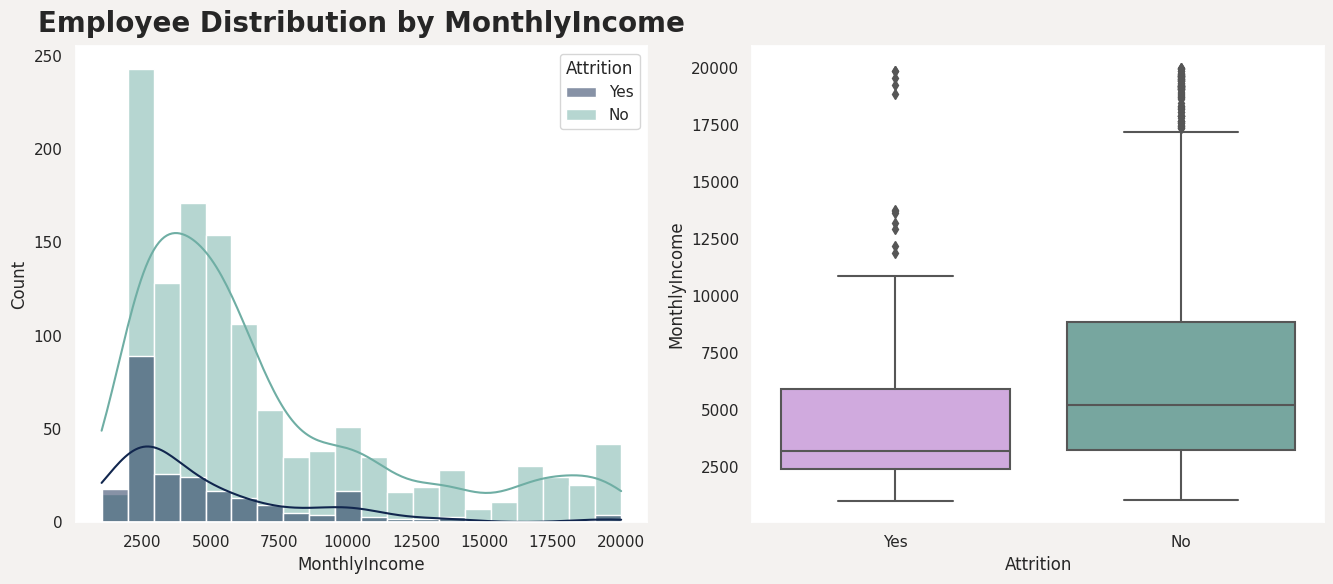

In [19]:
#Visualization to show Employee Distribution by MonthlyIncome.
distribution_plots('MonthlyIncome')

The average monthly income of employee who have left is comparatively low with employee who are still working. As the Monthly Income increases the attrition decreases.

In [20]:
cat_cols=[]
for i in df.columns:
    if df[i].nunique() <= 5 or df[i].dtype == object:
        cat_cols.append(i)
df_rev=df.copy()
df_rev.drop(df_rev[cat_cols], axis=1, inplace=True)
corr=df_rev.corr().round(2)
x=corr.index.tolist()
y=corr.columns.tolist()
z=corr.to_numpy()
fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=z, name='',
                                  hovertemplate="Correlation between %{x} and %{y}= %{z}",
                                  colorscale='plasma')
fig.update_yaxes(autorange="reversed")
fig.update_layout(title="Correlation Matrix of Employee Attrition",
                  font_color='#28221D',margin=dict(t=180),height=600)
fig.show()

MonthlyIncome has a strong positive correlation to TotalWorkingYears of 0.77. Additionally, YearsAtCompany has a strong positive association with YearsWithCurrManager (correlation = 0.77), as well as with YearsInCurrentRole (correlation = 0.76). There are no variables with a correlation above 0.8, indicating a potential collinearity issue.

In [21]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories(
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#73AF8E', '#4F909B', '#707BAD', '#A89DB7','#C99193']
fig = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome',
                 color='JobLevel', size='MonthlyIncome',
                 color_discrete_sequence=col,
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='Monthly income increases with total number of years worked and job level <br>',
                  xaxis_title='Total Working Years', yaxis=dict(title='Income',tickprefix='$'),
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Monthly income is positively correlated with total number of years worked and there is strong association between an employee's earnings and their job level.

In [22]:
plot_df = df.groupby('JobRole')['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='JobRole', y='Salary', text='Salary', opacity=0.7)
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), marker_color='#3A5F53')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Job Role', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), height=500,
                  xaxis_title='', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [23]:
plot_df=df.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition',
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': "#D4A1E7", 'No': "#6faea4"})
fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

The distribution of monthly income for both current and former employees is positively skewed and lower overall among staff who left.

**Machine learning**

In [29]:
# Convert 'Attrition' to binary numeric format
df['Attrition_Binary'] = np.where(df['Attrition'] == 'Yes', 1, 0)


In [30]:
df = df.drop(['Attrition'], axis=1)

In [31]:
# Split our preprocessed data into our features and target arrays
y=df["Attrition_Binary"]
y.shape


(1470,)

In [32]:
X = df.drop(["Attrition_Binary"], axis=1)
X = pd.get_dummies(X)
X.shape

(1470, 51)

Check the balance of the labels variable (y) by using the value_counts function.

In [33]:
# Check the balance of our target values
value_counts = y.value_counts()
print(value_counts)

0    1233
1     237
Name: Attrition_Binary, dtype: int64


In [34]:
# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

**Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.**


Create a Logistic Regression Model with the Original Data
Step 1: Fit a logistic regression model by using the training data (X_train and y_train).

In [37]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [38]:
# Checking the training y values
value_counts = y_train.value_counts()
print(value_counts)

0    912
1    190
Name: Attrition_Binary, dtype: int64


Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.

In [39]:
# Make a prediction using the testing data
testing_predictions = logistic_regression_model.predict(X_test)

Evaluate the model’s performance by doing the following Calculate the accuracy score of the model.

Generate a confusion matrix.

Print the classification report.

In [40]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
# Instantiate the logistic regression classifier
log_classifier = LogisticRegression()

# Fit the model to your training data
log_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_classifier.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic regression model accuracy: {accuracy:.3f}")

Logistic regression model accuracy: 0.872


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Problem: Imbalanced Data Distribution
In Machine Learning and Data Science we often come across a term called Imbalanced Data Distribution, generally happens when observations in one of the class are much higher or lower than the other classes.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

SMOTE – Oversampling
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

Use the RandomOverSampler module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points.

In [41]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state=1)
# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = random_oversampler.fit_resample(X_train, y_train)

In [42]:
# Count the distinct values of the resampled labels data
import numpy as np
# Count the distinct values of the resampled labels data
unique_labels = np.unique(y_train_resampled)
num_classes = len(unique_labels)

print("Number of distinct classes:", num_classes)
print("Distinct classes:", unique_labels)

Number of distinct classes: 2
Distinct classes: [0 1]


Use the LogisticRegression classifier and the resampled data to fit the model and make predictions

In [43]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model_ros = LogisticRegression(solver='liblinear', max_iter=1000)
# Fit the model using the resampled training data
logistic_regression_model_ros.fit(X_train_resampled, y_train_resampled)
# Make a prediction using the testing data
y_pred_ros = logistic_regression_model_ros.predict(X_test)

In [44]:
# Checking the resampled training y values
value_counts = y_train_resampled.value_counts()
print(value_counts)

1    912
0    912
Name: Attrition_Binary, dtype: int64


Evaluate the model’s performance by doing the following:

In [45]:
# Print the balanced_accuracy score of the model
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_ros)
formatted_accuracy = "{:.3f}".format(balanced_accuracy)
print("Balanced accuracy score:", formatted_accuracy)

Balanced accuracy score: 0.740


In [46]:
# Generate a confusion matrix for the model
confusion_mtx = confusion_matrix(y_test, y_pred_ros)
print("Confusion Matrix:")
print(confusion_mtx)

Confusion Matrix:
[[243  78]
 [ 13  34]]


In [47]:
# Print the classification report for the model
classification_rep = classification_report(y_test, y_pred_ros)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       321
           1       0.30      0.72      0.43        47

    accuracy                           0.75       368
   macro avg       0.63      0.74      0.63       368
weighted avg       0.87      0.75      0.79       368



**Random Forests
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned Random decision forests correct for decision trees' habit of overfitting to their training set.Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees.However, data characteristics can affect their performance**


In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train_resampled, y_train_resampled)
y_pred = rfc.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.9693877551020408


**Gradient Boosted
Gradient Boosting is also an ensemble technique much like the Random Forest where a combination of weak Tree learners are brought together to form a relatively stronger learner. The technique involves defining some sort of function (loss function) that you want minimised and an method/algorithm to minimise this. Therefore as the name suggests, the algorithm used to minimise the loss function is that of a gradient descent method which adds decision trees which "point" in the direction that reduces our loss function (downward gradient).**

In [50]:
seed=0
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0}

from sklearn.ensemble import  GradientBoostingClassifier

gb = GradientBoostingClassifier(**gb_params)
gb.fit(X_train_resampled, y_train_resampled)

gb_predictions = gb.predict(x_test)
print('accuracy',metrics.accuracy_score(y_test, gb_predictions))

accuracy 0.9795918367346939
